In [99]:

#%pip install keras tensorflow
#Dataset transform: We change parameters with the Illinois dataset.
#Future selection showed that Precipitation, Temperature max and min and Solar radiation are the factors that significantly impact the yield.
# With Adaptive optimizer (ADAM)
#1. Normal dataset: Y=0.75, Yhat= 0.782, MAE = 0.01040  ########################## Y=0.78272 , Yhat=0.865  , MAE= 0.01288
#2. We changed the Solar radiation: Y=0.75, Yhat = 0.756, MAE= 0.01886  ########################## Y=0.78272 ,Yhat= 0.800  , MAE= 0.01726 
#3. We changed the Precipitation: Y=0.75, Yhat = 0.760 , MAE= 0.01995   ########################## Y=0.78272 ,Yhat= 0.807 , MAE= 0.01474
#4. We changed the Min_Temperature: Y=0.75, Yhat = 0.757 , MAE= 0.01677 ########################## Y=0.78272 ,Yhat= 0.791 , MAE=0.01285
#5. We changed the Max_Temperature: Y=0.75, Yhat = 0.752, MAE= 0.01648  ########################## Y=0.78272 ,Yhat= 0.812 , MAE=0.01699 
#6. We changed All the 4 parameters: Y=0.75, Yhat = 0.772 , MAE= 0.01538 ########################## Y=0.78272 ,Yhat= 0.820 , MAE= 0.01382

# With Stochastic Gradient Descent (SGD)
#1. Normal dataset: Y=0.75, Yhat= 0.791, MAE = 0.01564 ########################## Y=0.78272 ,Yhat= 0.896 , MAE= 0.01915
#2. We changed the Solar radiation: Y=0.75, Yhat = 0.772, MAE= 0.02294 ########################## Y=0.78272, Yhat=0.793, MAE=0.02420
#3. We changed the Precipitation: Y=0.75, Yhat = 0.794 , MAE= 0.01483 ########################## Y=0.78272, Yhat=0.821, MAE=0.01723
#4. We changed the Min_Temperature: Y=0.75, Yhat = 0.771 , MAE= 0.01459 ########################## Y=0.78272 ,Yhat= 0.813 , MAE= 0.01605
#5. We changed the Max_Temperature: Y=0.75, Yhat = 0.776, MAE= 0.01629  ########################## Y=0.78272 ,Yhat= 0.826 , MAE= 0.01634
#6. We changed All the 4 parameters: Y=0.75, Yhat = 0.797, MAE= 0.01988 ########################## Y=0.78272 ,Yhat= 0.888 , MAE= 


In [100]:
# plt.figure(9)
# plt.plot(lsIndex, lsSN)
# plt.xlabel('time (day)')
# plt.ylabel('soil nitrogen (gN/m^2d)')
# plt.title('Soil Nitrogen')
# plt.show()

# print('############################# LAI ##########################')
# print(lsLAI)
# print('############################# Grain Values ##########################')

# print('############################# lsNUP ##########################')
# print(lsNUP)

In [101]:
#%pip install scikeras

In [1]:

# first neural network with keras tutorial
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from numpy import unique
from numpy import argmax
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler
#from keras.optimizers import SGD

In [2]:
# load the dataset
dataset = loadtxt('datas.csv', delimiter=',') #('Dataset_transformAll.csv', delimiter=',') # #('Audrey_Dataset.csv', delimiter=',')
# split into input (X) and output (y) variables
#X = dataset[:,0:7]
#y = dataset[:,7]

In [3]:
###############################################################################################
#Dataset transform: We change parameters with the Illinois dataset.
#Future selection showed that Precipitation, Temperature max and min and Solar radiation are the factors that significantly impact the yield.
#1. Normal dataset: Y=0.75, Yhat= 0.774, MAE = 0.00901
#2. We changed the Solar radiation: Y=0.75, Yhat = 0.785, MAE= 0.01315
#3. We changed the Precipitation: Y=0.75, Yhat = 0.788 , MAE= 0.01014
#4. We changed the Min_Temperature: Y=0.75, Yhat = 0.773 , MAE= 0.01182
#5. We changed the Max_Temperature: Y=0.75, Yhat = 0.763 , MAE= 0.02105
#6. We changed All the 4 parameters: Y=0.75, Yhat = 0.771 , MAE= 0.01477
###############################################################################################


In [4]:
#EXERCICE3

X, y = make_regression(n_samples=181, n_features=7, noise=0.1, random_state=1)
n_train = 75
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(testy), 1)
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy) 

In [5]:
#EXERCICE3
model = Sequential()
model.add(Dense(20, input_dim=7, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))


In [6]:
#EXERCICE 3
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
#EXERCICE 3
# compile model
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.0, momentum=0.7, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [8]:
#EXERCICE 3
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=2)

Epoch 1/100
3/3 - 1s - loss: 0.9743 - val_loss: 0.5865 - 892ms/epoch - 297ms/step
Epoch 2/100
3/3 - 0s - loss: 0.9672 - val_loss: 0.5802 - 217ms/epoch - 72ms/step
Epoch 3/100
3/3 - 0s - loss: 0.9520 - val_loss: 0.5747 - 79ms/epoch - 26ms/step
Epoch 4/100
3/3 - 0s - loss: 0.9354 - val_loss: 0.5638 - 73ms/epoch - 24ms/step
Epoch 5/100
3/3 - 0s - loss: 0.9141 - val_loss: 0.5537 - 138ms/epoch - 46ms/step
Epoch 6/100
3/3 - 0s - loss: 0.8905 - val_loss: 0.5382 - 52ms/epoch - 17ms/step
Epoch 7/100
3/3 - 0s - loss: 0.8560 - val_loss: 0.5162 - 45ms/epoch - 15ms/step
Epoch 8/100
3/3 - 0s - loss: 0.8209 - val_loss: 0.4890 - 43ms/epoch - 14ms/step
Epoch 9/100
3/3 - 0s - loss: 0.7780 - val_loss: 0.4631 - 60ms/epoch - 20ms/step
Epoch 10/100
3/3 - 0s - loss: 0.7300 - val_loss: 0.4365 - 58ms/epoch - 19ms/step
Epoch 11/100
3/3 - 0s - loss: 0.6777 - val_loss: 0.4055 - 44ms/epoch - 15ms/step
Epoch 12/100
3/3 - 0s - loss: 0.6186 - val_loss: 0.3672 - 59ms/epoch - 20ms/step
Epoch 13/100
3/3 - 0s - loss: 0.5

In [9]:
#EXERCICE 3
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

Train: 0.006, Test: 0.007


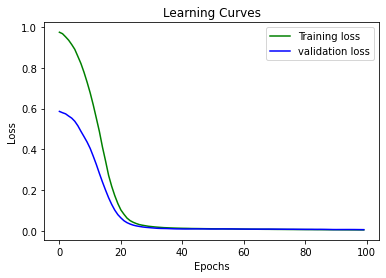

In [12]:
#EXERCICE 3
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], 'g',label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='validation loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
# # #ESSAI 3  -----OK##################################################
X = dataset[:,0:7]
y = dataset[:,7]
scalarX, scalarY = MinMaxScaler(feature_range=(0,1)), MinMaxScaler(feature_range=(0,0.75))
scalarX.fit(X)
scalarY.fit(y.reshape(94,1)) 
X = scalarX.transform(X)
y=np.array(y).reshape(94,1) 
y = scalarY.transform(y) 

In [19]:
#print(y)

In [20]:
# define the keras model ####OK
model = Sequential()
model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu')) #kernel_initializer='normal'
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #linear
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                160       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.0, momentum=0.7, nesterov=False) ####OK
#adam=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(optimizer=sgd, loss='mean_absolute_error')

In [22]:
# fit the keras model on the dataset REAL DATA
history = model.fit(X, y, epochs=100, batch_size=4, verbose=2, validation_split=0.20)

Epoch 1/100
19/19 - 0s - loss: 0.0777 - val_loss: 0.6366 - 401ms/epoch - 21ms/step
Epoch 2/100
19/19 - 0s - loss: 0.0781 - val_loss: 0.6194 - 69ms/epoch - 4ms/step
Epoch 3/100
19/19 - 0s - loss: 0.0794 - val_loss: 0.6062 - 58ms/epoch - 3ms/step
Epoch 4/100
19/19 - 0s - loss: 0.0760 - val_loss: 0.6178 - 56ms/epoch - 3ms/step
Epoch 5/100
19/19 - 0s - loss: 0.0737 - val_loss: 0.5995 - 58ms/epoch - 3ms/step
Epoch 6/100
19/19 - 0s - loss: 0.0719 - val_loss: 0.5711 - 55ms/epoch - 3ms/step
Epoch 7/100
19/19 - 0s - loss: 0.0739 - val_loss: 0.6096 - 60ms/epoch - 3ms/step
Epoch 8/100
19/19 - 0s - loss: 0.0722 - val_loss: 0.6005 - 55ms/epoch - 3ms/step
Epoch 9/100
19/19 - 0s - loss: 0.0712 - val_loss: 0.5901 - 58ms/epoch - 3ms/step
Epoch 10/100
19/19 - 0s - loss: 0.0699 - val_loss: 0.5342 - 55ms/epoch - 3ms/step
Epoch 11/100
19/19 - 0s - loss: 0.0718 - val_loss: 0.5674 - 79ms/epoch - 4ms/step
Epoch 12/100
19/19 - 0s - loss: 0.0681 - val_loss: 0.5242 - 59ms/epoch - 3ms/step
Epoch 13/100
19/19 - 0s

In [23]:
# evaluate on test set
yhat = model.predict(X)
error = mean_absolute_error(y, yhat)
print('MAE: %.5f' % error)


MAE: 0.02137


In [63]:
#print(yhat) 

In [64]:
#print(y)

In [105]:
###plt.plot(y)

In [106]:
####plt.plot(yhat)

In [107]:
#####print(yhat-y) 

In [24]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


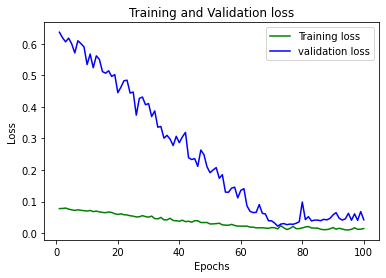

In [25]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()